In [702]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
from   numpy import nan as NaN
from sklearn import preprocessing
import xgboost as xgb
from sklearn.externals import joblib
from sklearn.metrics import mean_absolute_error

In [703]:
inputCols = ['age at death','breed','date of last vet visit','hair length','height','number of vet visits','weight']
cats = pd.read_csv('../input/cats.csv')
cats = cats[inputCols]
#When checking take first column out firt and check if all fields are present if it is then
#continue..
#Train would expect age at death
#predict would not expect age at death

In [739]:
predict_cols=['breed','date of last vet visit','hair length','height','number of vet visits','weight']
cats = pd.read_csv('../input/cats.csv')
cats = cats[predict_cols]
cats.to_csv('../input/cats_pred.csv')


In [744]:
cats_preds = pd.read_csv('../output/cats.csv')

In [704]:
cats.head(10)

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
0,7.0,Siamese,2009-08-02 14:02:18,0.883886,21.611951,5,4.0
1,9.0,Siamese,2013-11-27 19:08:52,1.221535,26.451956,10,4.0
2,8.0,Manx,2016-01-12 04:39:24,0.967718,18.540191,10,5.0
3,8.0,Maine Coon,2000-11-24 18:51:18,1.090641,16.564362,12,7.0
4,8.0,Maine Coon,2014-07-03 22:17:26,1.004712,22.535495,7,7.0
5,6.0,Manx,2015-04-01 15:59:09,1.162277,21.058384,2,4.0
6,10.0,Maine Coon,2009-09-22 14:45:32,1.124792,20.077523,5,8.0
7,10.0,Rex,2004-12-01 01:52:43,0.897989,22.306296,8,6.0
8,13.0,Manx,2013-03-12 18:51:45,1.123624,24.001434,7,2.0
9,12.0,Maine Coon,2007-01-03 08:38:36,1.058746,25.013866,6,3.0


In [745]:
cats_preds.head()

,Unnamed: 0,breed,date of last vet visit,hair length,height,number of vet visits,weight,age at death
0,0,Siamese,2009-08-02 14:02:18,0.883886,21.611951,5,4.0,9.103097
1,1,Siamese,2013-11-27 19:08:52,1.221535,26.451956,10,4.0,9.134839
2,2,Manx,2016-01-12 04:39:24,0.967718,18.540191,10,5.0,7.884093
3,3,Maine Coon,2000-11-24 18:51:18,1.090641,16.564362,12,7.0,7.884621
4,4,Maine Coon,2014-07-03 22:17:26,1.004712,22.535495,7,7.0,8.760926


In [705]:
cats.info()
#Data quality is good with very few to no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
age at death              299 non-null float64
breed                     300 non-null object
date of last vet visit    300 non-null object
hair length               299 non-null float64
height                    300 non-null float64
number of vet visits      300 non-null int64
weight                    300 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 16.5+ KB


In [706]:
cats.describe()

,age at death,hair length,height,number of vet visits,weight
count,299.000000,2.990000e+02,300.000000,300.000000,300.000000
mean,9.006689,3.027706e+09,20.498442,8.296667,3.957667
std,2.892937,5.235392e+10,5.107386,3.820643,2.033624
min,0.000000,6.904537e-01,5.077179,-1.000000,0.000000
25%,7.000000,9.377535e-01,16.958241,6.000000,2.000000
50%,9.000000,1.003253e+00,20.825805,8.000000,4.000000
75%,11.000000,1.067127e+00,24.043067,11.000000,5.250000
max,18.000000,9.052840e+11,33.043014,19.000000,10.000000


In [707]:
#Process
#ingest data
#drop duplicates 
#separate out dataset into train and validate 80/20 split
#Create validate variables (validate_target, validate_features)

#JUST USING TRAIN DATASEST
#Separate target column from features
#Change date format to just year
#converting all non float to float
#replace all nan values with median of column (to be able to normalise), for both train and train_y
#replace all outlier values of numeric datatypes from the start with 5th and 95th percentile
#normalise training values

#XGBOOST
#then feed into xgboost..
#generate model - tune using CV 10 fold
#Final validation - using validate_features predict values then compare with validate_target


In [708]:
#drop duplicates 
def removeDuplicates(df):
    df.drop_duplicates(inplace=True)


In [709]:
removeDuplicates(cats)

In [710]:
target = "age at death"

train = cats.sample(frac=0.8,random_state=2018)
train_y = pd.DataFrame(train.pop(target))
valid = cats.drop(train_features.index)
valid_y = pd.DataFrame(valid.pop(target))


In [711]:
def stripYear(df,dateCol):
    df[dateCol]=[datetime[:4] for datetime in df[dateCol]]
    

In [712]:
stripYear(train, "date of last vet visit")

In [713]:
train.head(10)

,breed,date of last vet visit,hair length,height,number of vet visits,weight
164,Rex,2007,0.936867,14.317804,9,1.0
234,Javanese,1999,1.154382,20.526782,11,1.0
9,Maine Coon,2007,1.058746,25.013866,6,3.0
271,Manx,2001,NaN,21.520845,7,7.0
297,Maine Coon,2008,1.053361,14.106118,9,3.0
95,Siamese,2004,0.909998,6.719702,10,2.0
54,Rex,2005,1.065585,18.863092,5,6.0
68,Siamese,2011,0.984925,20.748630,13,3.0
135,Siamese,2004,0.865965,22.442939,11,3.0
88,Manx,2015,1.002542,22.176817,8,2.0


In [716]:
#grab columns that are numerical to be applied for outlier removal later
numerical_cols=[]

def getNumericalCols(df):
    for col in df.columns:
        if df[col].dtype in ['float64','int64']:
            numerical_cols.append(col)
    return numerical_cols

In [717]:
numericalCols = getNumericalCols(train)


In [718]:
numericalCols

['hair length', 'height', 'number of vet visits', 'weight']

In [719]:
def encode(charcode):
    r=0
    ln = len(str(charcode))
    for i in range(ln):
        r += ord(str(charcode)[i])
    return r

def convertToFloat(df):
    for feature in df.columns:
        if df[feature].dtype == "object":
            df[feature] = df[feature].apply(encode)
        df[feature] = df[feature].astype(float)
    #missing values are converted to -1 and needs to be converted back to NaN again
    df = df.replace(-1, NaN)

In [720]:
#apply average of values if NaN
def replaceNaN(df):
    for feature in df.columns:
        if df[feature].isnull().values.any() == True:
            df[feature] = df[feature].fillna(df[feature].median(),axis=0)
    return df

In [721]:
def outliers(col):
    #replace outliers with 5th and 95th percentile
    # a number "a" from the vector "x" is an outlier if 
    # a > median(x)+1.5*iqr(x) or a < median-1.5*iqr(x)
    # iqr: interquantile range = third interquantile - first interquantile
    return col[np.abs(col - col.median()) > 1.5*(col.quantile(.75)-col.quantile(0.25))]

def replaceOutliers(df, numericalCols):
    #We need to use numerical columns before converting to float
    for col in numericalCols:
        # replace all outliers with median values
        out = outliers(df[col])
        df[col].replace(to_replace = [out.min(),out.max()], 
                        value = [np.percentile(df[col],5),np.percentile(df[col],95)],
                        inplace = True)

In [722]:
def normalise(df):
    cols = df.columns
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(df)
    df = pd.DataFrame(x_scaled)
    df.columns = cols
    return df


In [723]:
convertToFloat(train)
convertToFloat(valid)

In [724]:
train = replaceNaN(train)
train_y = replaceNaN(train_y)
valid = replaceNaN(valid)
valid_y = replaceNaN(valid_y)
train.head(10)

,breed,date of last vet visit,hair length,height,number of vet visits,weight
164,303.0,201.0,0.936867,14.317804,9.0,1.0
234,813.0,220.0,1.154382,20.526782,11.0,1.0
9,921.0,201.0,1.058746,25.013866,6.0,3.0
271,404.0,195.0,0.999147,21.520845,7.0,7.0
297,921.0,202.0,1.053361,14.106118,9.0,3.0
95,711.0,198.0,0.909998,6.719702,10.0,2.0
54,303.0,199.0,1.065585,18.863092,5.0,6.0
68,711.0,196.0,0.984925,20.748630,13.0,3.0
135,711.0,198.0,0.865965,22.442939,11.0,3.0
88,404.0,200.0,1.002542,22.176817,8.0,2.0


In [725]:
replaceOutliers(train, numericalCols)
replaceOutliers(valid, numericalCols)

In [726]:
train = normalise(train)
valid = normalise(valid)

In [727]:
train.head()

,breed,date of last vet visit,hair length,height,number of vet visits,weight
0,0.000000,0.269231,0.438111,0.338637,0.500000,0.125
1,0.825243,1.000000,0.867451,0.568061,0.611111,0.125
2,1.000000,0.269231,0.678680,0.733860,0.333333,0.375
3,0.163430,0.038462,0.561040,0.604792,0.388889,0.875
4,1.000000,0.307692,0.668051,0.330815,0.500000,0.375


In [728]:
valid.head()

,breed,date of last vet visit,hair length,height,number of vet visits,weight
0,0.660194,0.351852,0.206103,0.585676,0.2500,0.500
1,1.000000,0.351852,0.518737,0.641302,0.3750,0.875
2,0.825243,0.407407,0.418926,0.934948,0.4375,0.250
3,0.825243,0.370370,0.785449,0.540876,0.7500,0.625
4,0.163430,0.592593,0.049400,0.297925,0.3750,0.875


In [729]:
train.describe()

,breed,date of last vet visit,hair length,height,number of vet visits,weight
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.511239,0.261058,0.561025,0.564421,0.461343,0.482969
std,0.398996,0.271579,0.195246,0.188515,0.204954,0.247983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.163430,0.076923,0.428379,0.432294,0.333333,0.250000
50%,0.660194,0.192308,0.561040,0.566688,0.444444,0.500000
75%,0.825243,0.307692,0.680621,0.702817,0.611111,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [730]:
valid.describe()

,breed,date of last vet visit,hair length,height,number of vet visits,weight
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.604827,0.393210,0.568047,0.534904,0.456458,0.502083
std,0.376536,0.201260,0.239890,0.268850,0.225097,0.248397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.163430,0.273148,0.460653,0.383704,0.250000,0.375000
50%,0.660194,0.370370,0.597626,0.573349,0.437500,0.500000
75%,1.000000,0.490741,0.748129,0.696398,0.578125,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


XGBOOSTTT

In [731]:
xgdmat = xgb.DMatrix(train, train_y)

In [732]:
xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.8,
    'silent': 1,
    'subsample': 0.6,
    'learning_rate': 0.01,
    'objective': 'reg:linear',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'eval_metric': 'mae'
}

cv_xgb = xgb.cv(params=xgb_params, dtrain=xgdmat, num_boost_round=347, 
                nfold=10, stratified=False, early_stopping_rounds=50,show_stdv=True)



In [733]:
print(cv_xgb.shape)
best_num = cv_xgb.shape[0]

(347, 4)


In [734]:
#estimated from cv 2.35 years Mean absolute error from actual data
cv_xgb.iloc[best_num-1,0]

2.3517631

In [735]:
final_gb = xgb.train(xgb_params, xgdmat, num_boost_round=best_num)


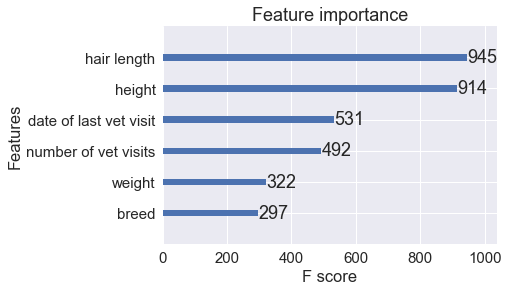

In [736]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)
xgb.plot_importance(final_gb)

In [737]:
#Export Model
print("Exporting Model")
joblib.dump(final_gb,"../model/xgb_model.dat")

Exporting Model


['../model/xgb_model.dat']

In [740]:
#Validation

clf= joblib.load("../model/xgb_model.dat")
validmat = xgb.DMatrix(valid)

valid_pred = clf.predict(validmat)

In [742]:
valid["preds"] = valid_pred

In [743]:
valid.head(10)

,breed,date of last vet visit,hair length,height,number of vet visits,weight,preds
0,0.660194,0.351852,0.206103,0.585676,0.2500,0.500,9.034513
1,1.000000,0.351852,0.518737,0.641302,0.3750,0.875,8.312065
2,0.825243,0.407407,0.418926,0.934948,0.4375,0.250,7.641839
3,0.825243,0.370370,0.785449,0.540876,0.7500,0.625,7.734291
4,0.163430,0.592593,0.049400,0.297925,0.3750,0.875,9.539156
5,0.825243,0.314815,0.759418,0.319417,0.2500,0.375,9.112435
6,1.000000,0.185185,0.624515,0.373390,0.8125,0.375,7.404046
7,0.163430,0.537037,0.497493,0.929538,0.4375,0.125,7.162603
8,0.660194,0.370370,0.676040,0.442214,0.6875,0.500,8.842073
9,0.660194,0.462963,0.770881,0.796465,0.2500,0.625,8.574995


In [741]:
type(valid_pred)

numpy.ndarray

In [694]:
valid_mae = mean_absolute_error(valid_y, valid_pred)
print(valid_mae)

2.3192580064137776


In [ ]:
Prediction

In [ ]:
Test cases

In [7]:
import pandas as pd
test = pd.DataFrame({'col1': [3, 4, 5, 2, 2], 
              'datecol': ["2009-08-02 14:02:18", "2009-08-02 14:02:18", "2009-08-02 14:02:18", "2009-08-02 14:02:18","2009-08-02 14:02:18"],
              'target': [1, 2, 2, 2, 2]})

In [11]:
test.columns

Index(['col1', 'datecol', 'target'], dtype='object')

In [17]:
test.isnull().values.any()

False